In [1]:
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = "retina"

import matplotlib.pyplot as plt
import numpy as np
from importlib import reload

import bemcs

# Barbot 2017 point source for a force in the $\mathbf{e}_2$ direction

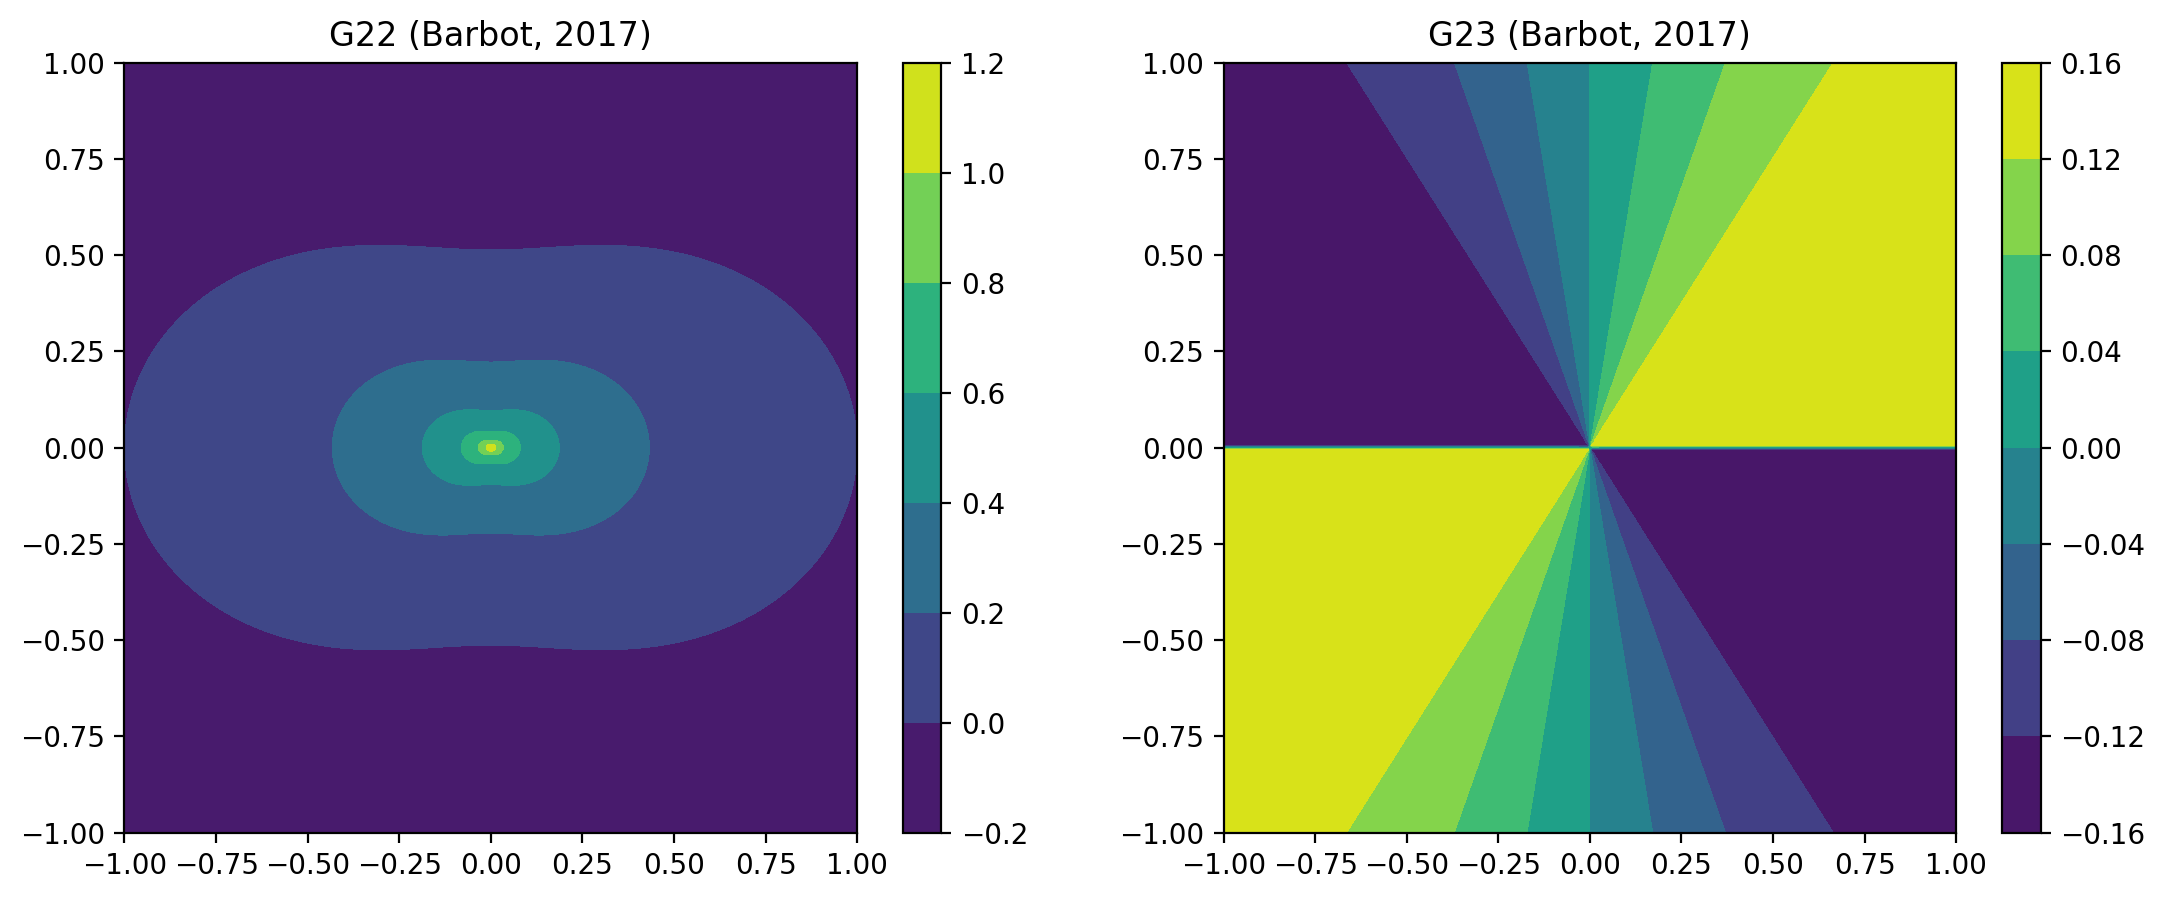

In [24]:
mu = 1
nu = 0.25
y2 = 0
y3 = 0
n_pts = 200
x2_vec = np.linspace(-1, 1, n_pts)
x3_vec = np.linspace(-1, 1, n_pts)
x2, x3 = np.meshgrid(x2_vec, x3_vec)
r1 = np.sqrt((x2 - y2) ** 2.0 + (x3 - y3) ** 2.0)
r2 = np.sqrt((x2 - y2) ** 2.0 + (x3 + y3) ** 2.0)
coeff = 1 / (2 * np.pi * mu * (1 - nu))

G22 = -coeff * (
    (3 - 4 * nu) / 4 * np.log(r1)
    + (8 * nu**2.0 - 12 * nu + 5) / 4 * np.log(r2)
    + (x3 - y3) ** 2.0 / (4 * r1**2.0)
    + ((3 - 4 * nu) * (x3 + y3) ** 2.0 + 2 * y3 * (x3 + y3) - 2 * y3**2.0)
    / (4 * r2**2.0)
    + y3 * x3 * (x3 + y3) ** 2.0 / r2**4.0
)

G23 = coeff * (
    (1 - 2 * nu) * (1 - nu) * np.arctan((x2 - y2) / (x3 + y3))
    + (x3 - y3) * (x2 - y2) / (4 * r1**2.0)
    + (3 - 4 * nu) * (x3 - y3) * (x2 - y2) / (4 * r2**2.0)
    + y3 * x3 * (x2 + y2) * (x3 + y3) / r2**4.0
)

plt.figure(figsize=(13, 5))
plt.subplot(1, 2, 1)
plt.contourf(x2, x3, G22)
plt.colorbar()
plt.title("G22 (Barbot, 2017)")

plt.subplot(1, 2, 2)
plt.contourf(x2, x3, G23)
plt.colorbar()
plt.title("G23 (Barbot, 2017)")
plt.show()


# Crouch and Starfield (1983) point source for a force in the $x$ direction

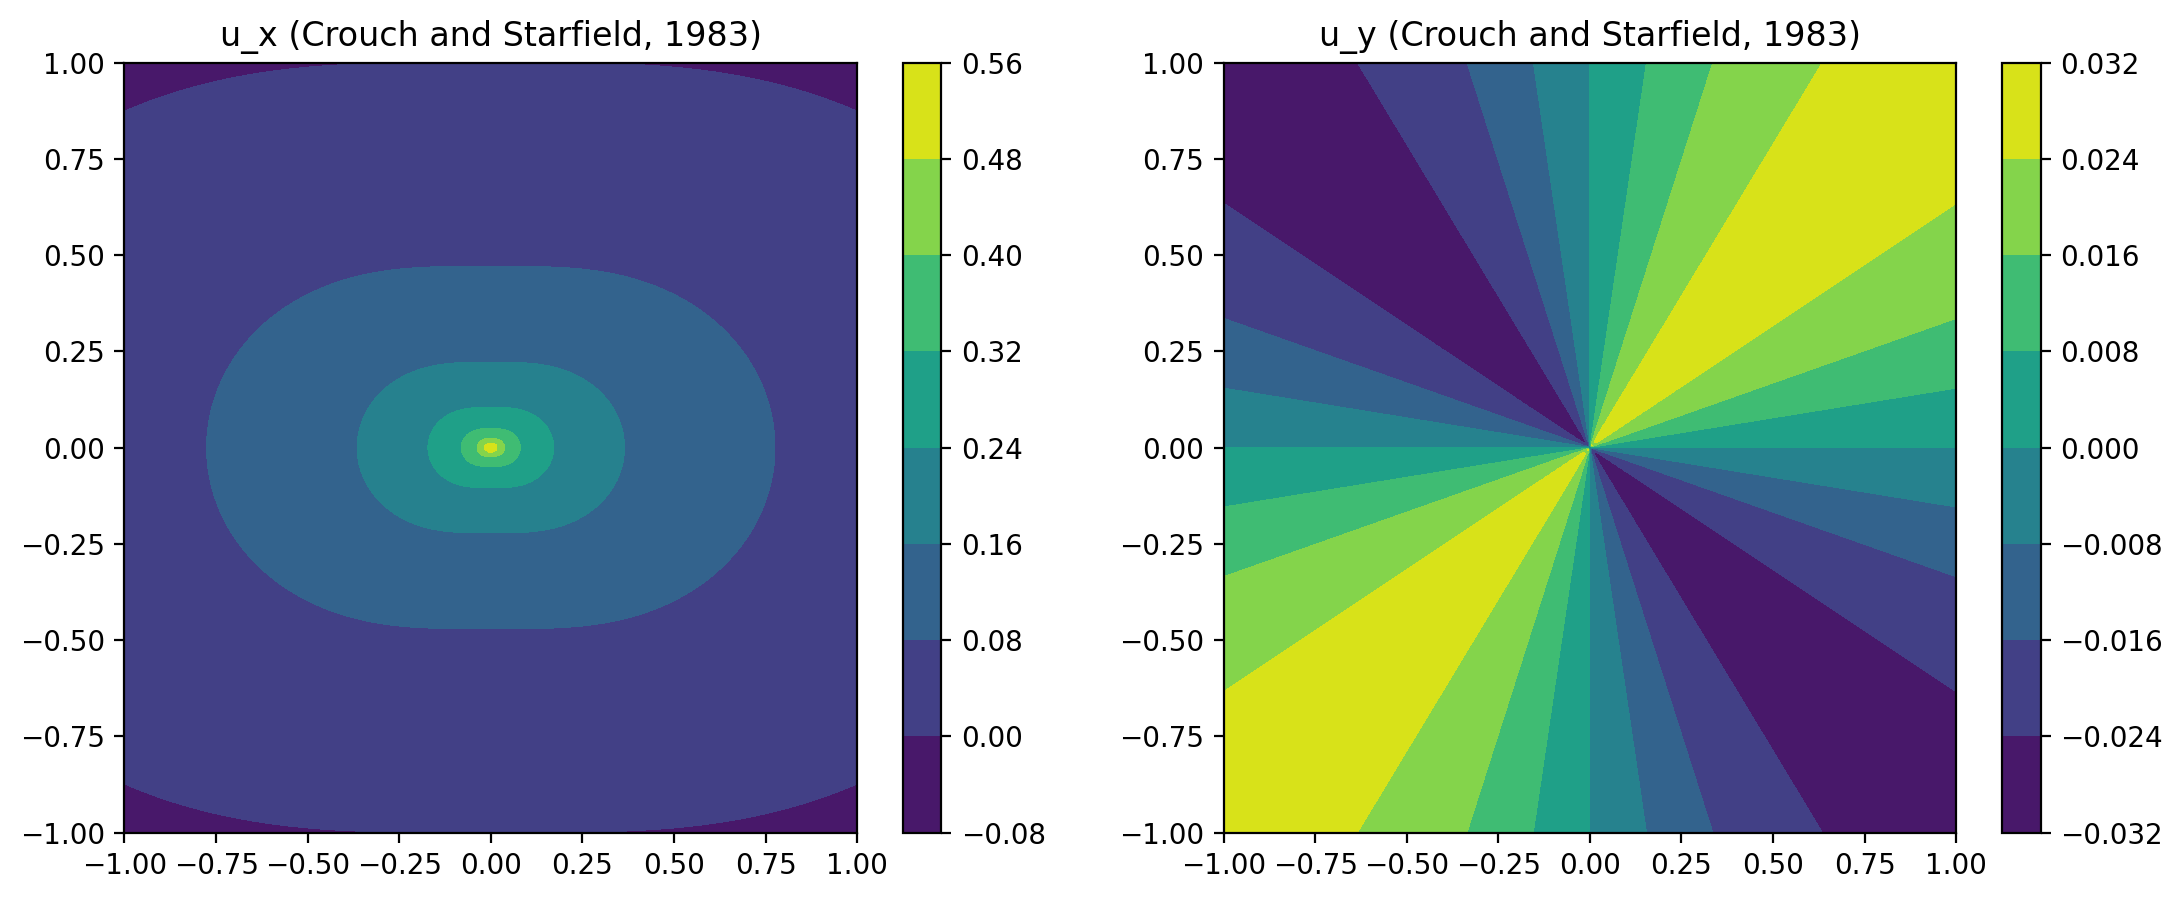

In [26]:
def kelvin_point_source(x, y, xoffset, yoffset, fx, fy, mu, nu):
    x = x - xoffset
    y = y - yoffset
    kelvin_displacements = np.zeros((len(x), 2))
    kelvin_stresses = np.zeros((len(x), 3))
    C = 1 / (4 * np.pi * (1 - nu))
    r = np.sqrt(x**2 + y**2)
    g = -C * np.log(r)
    gx = -C * x / (x**2 + y**2)
    gy = -C * y / (x**2 + y**2)
    gxy = C * 2 * x * y / (x**2 + y**2) ** 2
    gxx = C * (x**2 - y**2) / (x**2 + y**2) ** 2
    gyy = -gxx
    kelvin_displacements[:, 0] = fx / (2 * mu) * ((3 - 4 * nu) * g - x * gx) + fy / (
        2 * mu
    ) * (-y * gx)
    kelvin_displacements[:, 1] = fx / (2 * mu) * (-x * gy) + fy / (2 * mu) * (
        (3 - 4 * nu) * g - y * gy
    )
    kelvin_stresses[:, 0] = fx * (2 * (1 - nu) * gx - x * gxx) + fy * (
        2 * nu * gy - y * gxx
    )
    kelvin_stresses[:, 1] = fx * (2 * nu * gx - x * gyy) + fy * (
        2 * (1 - nu) * gy - y * gyy
    )
    kelvin_stresses[:, 2] = fx * ((1 - 2 * nu) * gy - x * gxy) + fy * (
        (1 - 2 * nu) * gx - y * gxy
    )
    return kelvin_displacements, kelvin_stresses


x_offset = 0
y_offset = 0
fx = 1
fy = 0
mu = 1
nu = 0.25
n_pts = 200
x_vec = np.linspace(-1.0, 1.0, n_pts)
y_vec = np.linspace(-1.0, 1.0, n_pts)
x_grid, y_grid = np.meshgrid(x_vec, y_vec)
kelvin_displacements, kelvin_stresses = kelvin_point_source(
    x_grid.flatten(), y_grid.flatten(), x_offset, y_offset, fx, fy, mu, nu
)
ux_kelvin = kelvin_displacements[:, 0]
uy_kelvin = kelvin_displacements[:, 1]

plt.figure(figsize=(13, 5))
plt.subplot(1, 2, 1)
plt.contourf(x_grid, y_grid, ux_kelvin.reshape(n_pts, n_pts))
plt.colorbar()
plt.title("u_x (Crouch and Starfield, 1983)")

plt.subplot(1, 2, 2)
plt.contourf(x_grid, y_grid, uy_kelvin.reshape(n_pts, n_pts))
plt.colorbar()
plt.title("u_y (Crouch and Starfield, 1983)")

plt.show()
